# Центральная предельная теорема своими руками

## Инструкции ###

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Review criteria

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

## Центральные предельные теоремы

Центра́льные преде́льные теоре́мы (Ц. П. Т.) — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Так как многие случайные величины в приложениях формируются под влиянием нескольких слабо зависимых случайных факторов, их распределение считают нормальным. При этом должно соблюдаться условие, что ни один из факторов не является доминирующим. Центральные предельные теоремы в этих случаях обосновывают применение нормального распределения.

## Распределение Парето

Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных 
распределений, являющихся степенными. Называется по имени Вилфредо Парето. 
Встречается при исследовании различных явлений, в частности, социальных, экономических, физических 
и других[1]. Вне области экономики иногда называется также распределением Брэдфорда.

Bилфредо Парето изначально использовал это распределение для описания распределения благосостояния, 
а также распределения дохода[2]. Его правило 20 к 80 (которое гласит: 20 % популяции владеет 80 % богатства) 
однако зависит от конкретной величины k, и утверждается, что фактически встречаются существенные 
количественные отклонения, например, данные самого Парето по Британии в Cours d'économie politique 
говорят, что там примерно 30 % населения владеет 70 % общего дохода.

Распределение Парето встречается не только в экономике. Можно привести следующие примеры:

* В лингвистике распределение Парето известно под именем закона Ципфа (для разных языков показатель степени может несколько различаться, также существует небольшое отклонение от простой степенной зависимости у самых частотных слов, однако в целом степенной закон описывает это распределение достаточно хорошо). Частными проявлениями этой закономерности можно считать:
* Зависимость абсолютной частоты слов (сколько всего раз каждое конкретное слово встретилось) в достаточно длинном тексте от ранга (порядкового номера при упорядочении слов по абсолютной частоте). Степенной характер остается вне зависимости от того, приводятся ли слова к начальной форме или берутся из текста как есть.
* Аналогичная кривая для популярности имен.
* Распределение размера населенных пунктов.[3]
* Распределение размера файла в интернет-трафике по TCP-протоколу.[3]

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto



In [68]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### ШАГ №1
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Непреры́вное равноме́рное распределе́ние — в теории вероятностей — распределение случайной вещественной величины, принимающей значения, принадлежащие интервалу [a, b], характеризующееся тем, что плотность вероятности на этом интервале постоянна.

In [69]:
# Выбор параметров для распределения
k = 10

#Сгенерируйте из него выборку объёма 1000
sampleRange = pareto.rvs(k, size=1000)

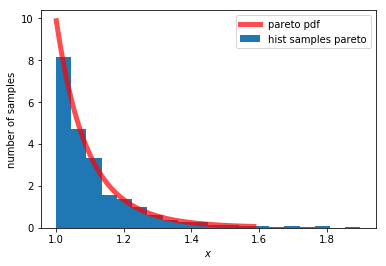

In [98]:
#Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.
plt.hist(sampleRange, density = True, bins=20, alpha=1, label='hist samples pareto')
plt.ylabel('number of samples')
plt.xlabel('$x$')

#Теоретическая плотность распределения случайной величины
left = pareto.ppf(0.01, k)
right =  pareto.ppf(0.99, k)
x = np.linspace(left,  right, 100)
plt.plot(x, pareto.pdf(x, k), 'r-', lw=5, alpha=0.7, label='pareto pdf')
plt.legend(loc='best') 

### ШАГ №2

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. **Обратите внимание**: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [93]:
# функция построения гистограммы распределений выборочных средних 
# и плотности соответствующего нормального распределения 

def ParetoFunc(sizeSamples, Ex, Dx):
    n = sizeSamples
    
    #генерация выборок
    values = np.array([ pareto.rvs(k, size=n) for x in range(1000)])
    
    #вычисление выборочных средних
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, density=True, alpha=1, label='hist mean n ' + str(n))
    
    #математическое ожидание mu и sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print ('математическое ожидание=' , mu)
    print ('sigma=' , sigma)
    
    # зададим нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0.5,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='pareto pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

In [94]:
# Теоретические EX, std, DX  распределения
EX = pareto.mean(k)
std = pareto.std(k)
DX = std**2
print ('Ex=', EX, ' STD=', std, ' DX=', DX)

Ex= 1.1111111111111112  STD= 0.12422599874998831  DX= 0.015432098765432098


математическое ожидание= 1.1111111111111112
sigma= 0.05555555555555555


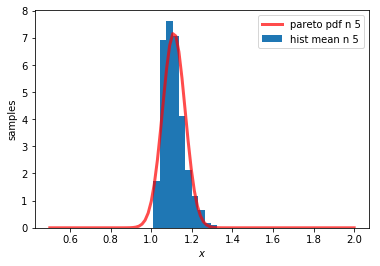

In [95]:
# При n = 5 генерируем 1000 выборок объёма n и строим гистограммы распределений их выборочных средних.
ParetoFunc(5, EX, DX)

математическое ожидание= 1.1111111111111112
sigma= 0.017568209223157664


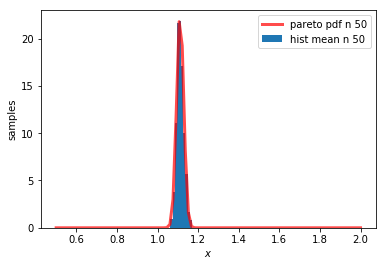

In [96]:
# При n = 50 генерируем 1000 выборок объёма n и строим гистограммы распределений их выборочных средних.
ParetoFunc(50, EX, DX)

математическое ожидание= 1.1111111111111112
sigma= 0.012422599874998832


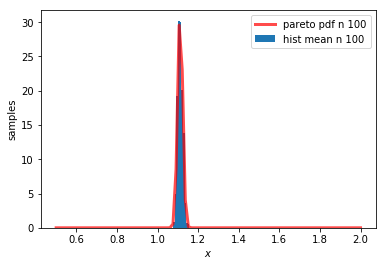

In [97]:
# При n = 100 генерируем 1000 выборок объёма n и строим гистограммы распределений их выборочных средних.
ParetoFunc(100, EX, DX)

<b>Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?</b>

Распределение выборочных средних для функции pareto хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. С ростом n точность аппроксимации увеличивается.